In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Loading the data



In [5]:
Data_set = pd.read_csv('/content/Reg-Data.txt',header=None)
Data_set['lg'] = Data_set[68]
Data_set['la'] = Data_set[69]
Data_set = Data_set.drop([68,69],axis = 1)
input = Data_set.drop(['lg','la'],axis = 1).values
output = Data_set[['lg','la']].values
Data_set

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,lg,la
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,...,-0.558717,0.998897,-0.106835,1.526307,0.646088,2.467278,1.867699,1.719302,-6.17,35.74
1055,1.640386,1.306224,0.192745,-1.816855,-1.311906,-2.128963,-1.875967,0.094232,-1.429742,0.873777,...,0.223143,-0.032425,0.226782,0.182107,0.517466,1.126762,2.220671,4.422651,11.55,104.91
1056,-0.772360,-0.670596,-0.840420,-0.832105,0.277346,1.152162,0.241470,0.229092,0.019036,-0.068804,...,0.449239,-0.965270,-0.590039,-0.804297,0.044170,-0.718175,-0.983640,-0.573822,41.33,19.80
1057,-0.996965,-1.099395,3.515274,-0.508185,-1.102654,0.192081,0.069821,0.264674,-0.411533,0.501164,...,1.941398,1.769292,0.738616,1.240377,-0.546002,-0.137473,-0.781036,-0.832167,54.68,25.31


## Train/Test Split
15% of the dataset is assigned to test set. 10% of the remaining data is assigned to validation set. And the rest is assigned to training set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=50)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=50)

## Data Preprocessing

### Dealing with null values
There are no null values.

In [8]:
Data_set.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
65    0
66    0
67    0
lg    0
la    0
Length: 70, dtype: int64

### Scaling features to a range
68 continuous features are not between 0 and 1. So let's use MinMaxScaler to scale this dataset.

In [9]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Converting the numpy arrays to tensors

In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
X_val_tensor = torch.tensor(X_val, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)

y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape(-1,2)
y_val_tensor = torch.tensor(y_val, dtype=torch.float).reshape(-1,2)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).reshape(-1,2)

## Part 1 : Linear Regression using Sklearn

In [11]:
reg = LinearRegression().fit(X_train, y_train)

print(f'Loss : {reg.score(X_test, y_test)}')

Loss : 0.2245902532528966


In [12]:
y_pred = reg.predict(X_test)
mean_squared_error = mean_squared_error(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)

print(f'MSE : {mean_squared_error}  MAE : {mean_absolute_error}')

MSE : 1222.2411347316672  MAE : 24.77076982524664


# Defining the model

In [13]:

class Model(nn.Module):
    def __init__(self, n_cont, output_size, layers, p=0.5, activation_function = nn.ReLU(inplace=True),
                enable_dropout = False, enable_batch_normalization = False) :
        super().__init__()
        self.enable_batch_normalization = enable_batch_normalization
        if enable_batch_normalization :
            self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        input_n = n_cont
        if len(layers) == 0 :
            layerlist.append(nn.Linear(input_n,output_size))
            if activation_function != None :
                layerlist.append(activation_function)
            if enable_dropout == True :
                layerlist.append(nn.Dropout(p))
        else :
            for i in layers:
                layerlist.append(nn.Linear(input_n,i)) 
                if activation_function != None :
                    layerlist.append(activation_function)
                if enable_batch_normalization :
                    layerlist.append(nn.BatchNorm1d(i))
                if enable_dropout == True :
                    layerlist.append(nn.Dropout(p))
                input_n = i
            layerlist.append(nn.Linear(layers[-1],output_size))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_1):
        if self.enable_batch_normalization :
            x_1 = self.bn_cont(x_1)
        x_1 = self.layers(x_1)
        return x_1

In [14]:
def train(model,criterion,optimizer,epochs) :
    train_loss_1 = []
    valid_loss_1 = []
    test_loss_1 = []

    for i in range(epochs):
        i += 1
        with torch.no_grad():
            valid_y = model(X_val_tensor)
            valid_loss = criterion(valid_y, y_val_tensor)
            valid_loss_1.append(valid_loss.item())
        with torch.no_grad():
            valid_y = model(X_test_tensor)
            test_loss = criterion(valid_y, y_test_tensor)
            test_loss_1.append(test_loss.item())

        prediction_y = model(X_train_tensor)
        loss = criterion(prediction_y, y_train_tensor)
        train_loss_1.append(loss.item())

        if i%5 == 1:
            print(f'Epoch: {i:3}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i:3}  Training Loss: {loss.item():10.8f} Validation Loss: {valid_loss} Test Loss: {test_loss}')

    return train_loss_1,valid_loss_1,test_loss_1


In [15]:
def show_diagrams(train_loss_1,valid_loss_1,test_loss_1) :
    
    plt.plot(train_loss_1)
    plt.plot(valid_loss_1)
    plt.plot(test_loss_1)
    plt.title('Loss per epoch')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation', 'test'], loc='upper right')
    plt.show()

# Part 2 : Neural network without any hidden layer

### Loss function : MSE & optimizer : SGD
I got the best result with MSE loss function and SGD optimizer.

In [16]:
torch.manual_seed(50)
input_features = 68
output_features = 2
hidden_layers = []
tr = Model(input_features, output_features, hidden_layers, p=0.5)
tr

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(tr.parameters(), lr=0.001, momentum=0.9)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [24]:
epochs = 100
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 1739.56823730 Validation Loss: 1546.58984375 Test Loss: 1870.268310546875
Epoch:   6  Training Loss: 1737.81237793 Validation Loss: 1546.619140625 Test Loss: 1868.7039794921875
Epoch:  11  Training Loss: 1736.08264160 Validation Loss: 1546.6343994140625 Test Loss: 1867.1541748046875
Epoch:  16  Training Loss: 1734.37829590 Validation Loss: 1546.6435546875 Test Loss: 1865.623046875
Epoch:  21  Training Loss: 1732.69848633 Validation Loss: 1546.65234375 Test Loss: 1864.1134033203125
Epoch:  26  Training Loss: 1731.04345703 Validation Loss: 1546.6639404296875 Test Loss: 1862.6273193359375
Epoch:  31  Training Loss: 1729.41223145 Validation Loss: 1546.6802978515625 Test Loss: 1861.1650390625
Epoch:  36  Training Loss: 1727.80432129 Validation Loss: 1546.70166015625 Test Loss: 1859.7265625
Epoch:  41  Training Loss: 1726.21911621 Validation Loss: 1546.726806640625 Test Loss: 1858.31103515625
Epoch:  46  Training Loss: 1724.65649414 Validation Loss: 1546.7547607421

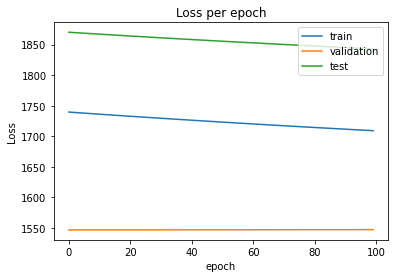

In [25]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [26]:
epochs = 1000
model = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(model,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:   6  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  11  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  16  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  21  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  26  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  31  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  36  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  41  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744.58984375
Epoch:  46  Training Loss: 2479.64184570 Validation Loss: 2448.155029296875 Test Loss: 2744

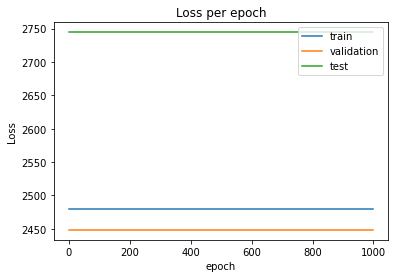

In [29]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

### Loss function : MSE & optimizer : Adam

In [30]:
torch.manual_seed(50)
input_features = 68
output_features = 2
hidden_layers = []
tr = Model(input_features, output_features, hidden_layers, p=0.5)
tr

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(tr.parameters(), lr=0.001)


#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [34]:
epochs = 100
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2468.62695312 Validation Loss: 2435.549560546875 Test Loss: 2732.228515625
Epoch:   6  Training Loss: 2464.60009766 Validation Loss: 2431.02197265625 Test Loss: 2727.78076171875
Epoch:  11  Training Loss: 2460.58593750 Validation Loss: 2426.507080078125 Test Loss: 2723.34521484375
Epoch:  16  Training Loss: 2456.58593750 Validation Loss: 2422.00634765625 Test Loss: 2718.9248046875
Epoch:  21  Training Loss: 2452.60107422 Validation Loss: 2417.519775390625 Test Loss: 2714.51904296875
Epoch:  26  Training Loss: 2448.63159180 Validation Loss: 2413.04931640625 Test Loss: 2710.130126953125
Epoch:  31  Training Loss: 2444.67846680 Validation Loss: 2408.5947265625 Test Loss: 2705.7568359375
Epoch:  36  Training Loss: 2440.74169922 Validation Loss: 2404.156982421875 Test Loss: 2701.401611328125
Epoch:  41  Training Loss: 2436.82202148 Validation Loss: 2399.736083984375 Test Loss: 2697.0634765625
Epoch:  46  Training Loss: 2432.91918945 Validation Loss: 2395.332763671

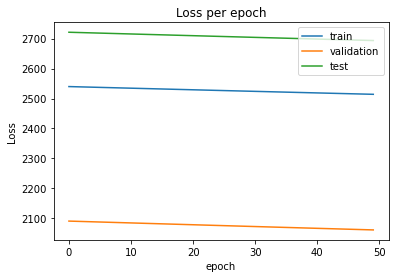

In [ ]:
show_diagrams(training_losses,valid_losses,test_losses)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [36]:
epochs = 1000
model = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2391.13134766 Validation Loss: 2348.053955078125 Test Loss: 2646.40576171875
Epoch:   6  Training Loss: 2387.43530273 Validation Loss: 2343.86083984375 Test Loss: 2642.30078125
Epoch:  11  Training Loss: 2383.75659180 Validation Loss: 2339.684814453125 Test Loss: 2638.212890625
Epoch:  16  Training Loss: 2380.09472656 Validation Loss: 2335.5263671875 Test Loss: 2634.143310546875
Epoch:  21  Training Loss: 2376.44970703 Validation Loss: 2331.385009765625 Test Loss: 2630.0908203125
Epoch:  26  Training Loss: 2372.82153320 Validation Loss: 2327.2607421875 Test Loss: 2626.055908203125
Epoch:  31  Training Loss: 2369.21020508 Validation Loss: 2323.153564453125 Test Loss: 2622.038818359375
Epoch:  36  Training Loss: 2365.61523438 Validation Loss: 2319.063232421875 Test Loss: 2618.038818359375
Epoch:  41  Training Loss: 2362.03759766 Validation Loss: 2314.990478515625 Test Loss: 2614.056640625
Epoch:  46  Training Loss: 2358.47631836 Validation Loss: 2310.9340820312

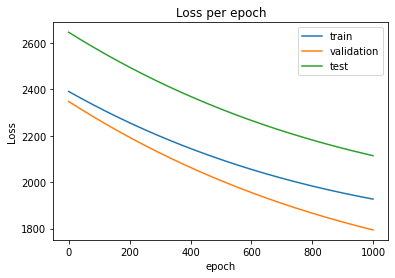

In [37]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

In [38]:
epochs = 10000
model = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 1926.66711426 Validation Loss: 1793.696533203125 Test Loss: 2113.755859375
Epoch:   6  Training Loss: 1925.43603516 Validation Loss: 1792.0823974609375 Test Loss: 2112.2529296875
Epoch:  11  Training Loss: 1924.21337891 Validation Loss: 1790.4774169921875 Test Loss: 2110.759033203125
Epoch:  16  Training Loss: 1922.99865723 Validation Loss: 1788.8812255859375 Test Loss: 2109.27392578125
Epoch:  21  Training Loss: 1921.79211426 Validation Loss: 1787.2935791015625 Test Loss: 2107.79736328125
Epoch:  26  Training Loss: 1920.59338379 Validation Loss: 1785.7152099609375 Test Loss: 2106.32958984375
Epoch:  31  Training Loss: 1919.40270996 Validation Loss: 1784.1456298828125 Test Loss: 2104.87060546875
Epoch:  36  Training Loss: 1918.21997070 Validation Loss: 1782.5845947265625 Test Loss: 2103.420166015625
Epoch:  41  Training Loss: 1917.04528809 Validation Loss: 1781.03271484375 Test Loss: 2101.978271484375
Epoch:  46  Training Loss: 1915.87829590 Validation Loss: 

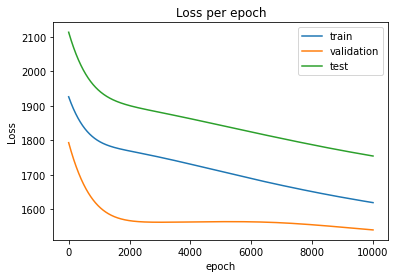

In [39]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

### Loss function : MAE & optimizer : SGD


In [40]:
torch.manual_seed(50)
input_features = 68
output_features = 2
hidden_layers = []
tr = Model(input_features, output_features, hidden_layers, p=0.5)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(tr.parameters(), lr=0.001, momentum=0.9)
tr

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [42]:
epochs = 100
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)


Epoch:   1  Training Loss: 39.23548126 Validation Loss: 40.11814880371094 Test Loss: 41.45738983154297
Epoch:   6  Training Loss: 39.22882462 Validation Loss: 40.10969543457031 Test Loss: 41.44982147216797
Epoch:  11  Training Loss: 39.21451569 Validation Loss: 40.091529846191406 Test Loss: 41.43356704711914
Epoch:  16  Training Loss: 39.19569778 Validation Loss: 40.067630767822266 Test Loss: 41.412174224853516
Epoch:  21  Training Loss: 39.17420959 Validation Loss: 40.04034423828125 Test Loss: 41.387760162353516
Epoch:  26  Training Loss: 39.15114594 Validation Loss: 40.01105880737305 Test Loss: 41.361549377441406
Epoch:  31  Training Loss: 39.12715912 Validation Loss: 39.9805908203125 Test Loss: 41.33428192138672
Epoch:  36  Training Loss: 39.10261536 Validation Loss: 39.94942855834961 Test Loss: 41.306396484375
Epoch:  41  Training Loss: 39.07775497 Validation Loss: 39.91785430908203 Test Loss: 41.278141021728516
Epoch:  46  Training Loss: 39.05270004 Validation Loss: 39.88603591918

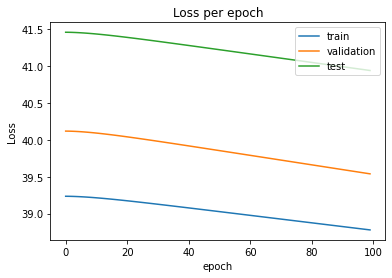

In [43]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)


#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [44]:
epochs = 1000
model = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)


Epoch:   1  Training Loss: 38.77444458 Validation Loss: 39.53268814086914 Test Loss: 40.93344497680664
Epoch:   6  Training Loss: 38.74911499 Validation Loss: 39.50052261352539 Test Loss: 40.904659271240234
Epoch:  11  Training Loss: 38.72378540 Validation Loss: 39.46835708618164 Test Loss: 40.87587356567383
Epoch:  16  Training Loss: 38.69844818 Validation Loss: 39.43618392944336 Test Loss: 40.847084045410156
Epoch:  21  Training Loss: 38.67311859 Validation Loss: 39.404022216796875 Test Loss: 40.818294525146484
Epoch:  26  Training Loss: 38.64786148 Validation Loss: 39.371856689453125 Test Loss: 40.789512634277344
Epoch:  31  Training Loss: 38.62305832 Validation Loss: 39.339813232421875 Test Loss: 40.76083755493164
Epoch:  36  Training Loss: 38.59922028 Validation Loss: 39.30811309814453 Test Loss: 40.73246765136719
Epoch:  41  Training Loss: 38.57670975 Validation Loss: 39.27708053588867 Test Loss: 40.70469284057617
Epoch:  46  Training Loss: 38.55527115 Validation Loss: 39.2468185

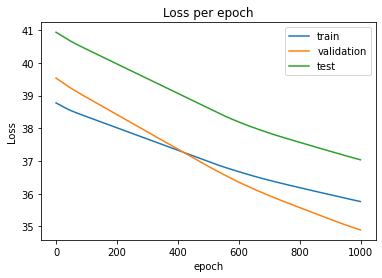

In [45]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

In [49]:
epochs = 5000
tr = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:   6  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  11  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  16  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  21  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  26  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  31  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  36  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  41  Training Loss: 39.32359695 Validation Loss: 40.230525970458984 Test Loss: 41.556602478027344
Epoch:  46  Training Loss: 39.32359695 Validation Loss:

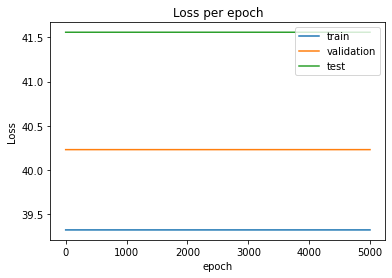

In [50]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

### Loss function : MAE & optimizer : Adam

In [52]:
torch.manual_seed(50)
input_features = 68
output_features = 2
hidden_layers = []
tr = Model(input_features, output_features, hidden_layers, p=0.5)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(tr.parameters(), lr=0.001)
tr


Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

#### Training for 50 epochs
The results from Linear Regression is bettet than this model.

In [54]:
epochs = 100
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)



Epoch:   1  Training Loss: 38.71606827 Validation Loss: 39.4741325378418 Test Loss: 40.868560791015625
Epoch:   6  Training Loss: 38.69009781 Validation Loss: 39.441932678222656 Test Loss: 40.83911895751953
Epoch:  11  Training Loss: 38.66436386 Validation Loss: 39.409767150878906 Test Loss: 40.80970764160156
Epoch:  16  Training Loss: 38.63926315 Validation Loss: 39.37778854370117 Test Loss: 40.78047180175781
Epoch:  21  Training Loss: 38.61502075 Validation Loss: 39.34619140625 Test Loss: 40.7515754699707
Epoch:  26  Training Loss: 38.59166336 Validation Loss: 39.315040588378906 Test Loss: 40.72308349609375
Epoch:  31  Training Loss: 38.56940460 Validation Loss: 39.28446578979492 Test Loss: 40.69511795043945
Epoch:  36  Training Loss: 38.54779434 Validation Loss: 39.25440979003906 Test Loss: 40.66761779785156
Epoch:  41  Training Loss: 38.52669907 Validation Loss: 39.2247428894043 Test Loss: 40.64048385620117
Epoch:  46  Training Loss: 38.50645065 Validation Loss: 39.195518493652344 

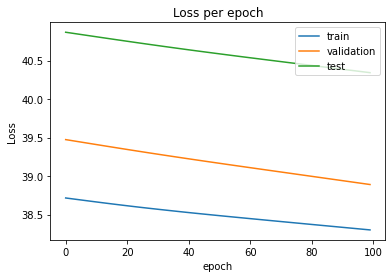

In [56]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

#### Training for 10 epochs
The results from Linear Regression is bettet than this model.

In [57]:
epochs = 1000
tr = Model(input_features, output_features, hidden_layers, p=0.5)
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)



Epoch:   1  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:   6  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  11  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  16  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  21  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  26  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  31  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  36  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  41  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  46  Training Loss: 39.28547287 Validation Loss: 40.1985969543457 Test Loss: 41.52099609375
Epoch:  51

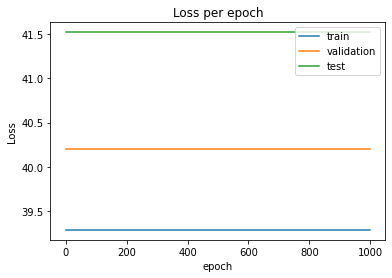

In [58]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)


# Part 3 
ReLU was chosen as the activation function because the range of other activation functions is not between (-180,180).
As you can see, the results almost stayed the same with or without the activation function.

In [59]:
input_features = 68
output_features = 2
hidden_layers = []
tr = Model(input_features, output_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(tr.parameters(), lr=0.001, momentum=0.9)
tr

Model(
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=2, bias=True)
    (1): ReLU(inplace=True)
  )
)

### 50 Epochs

In [60]:
epochs = 100
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2470.60473633 Validation Loss: 2439.492919921875 Test Loss: 2734.841064453125
Epoch:   6  Training Loss: 2256.10961914 Validation Loss: 2197.303466796875 Test Loss: 2509.598876953125
Epoch:  11  Training Loss: 1900.90063477 Validation Loss: 1785.1776123046875 Test Loss: 2134.05078125
Epoch:  16  Training Loss: 1624.82824707 Validation Loss: 1443.302001953125 Test Loss: 1835.9298095703125
Epoch:  21  Training Loss: 1486.96081543 Validation Loss: 1245.5555419921875 Test Loss: 1679.089599609375
Epoch:  26  Training Loss: 1448.44274902 Validation Loss: 1161.8509521484375 Test Loss: 1626.804443359375
Epoch:  31  Training Loss: 1451.10156250 Validation Loss: 1136.9619140625 Test Loss: 1621.189453125
Epoch:  36  Training Loss: 1457.70617676 Validation Loss: 1132.161376953125 Test Loss: 1624.2314453125
Epoch:  41  Training Loss: 1456.21765137 Validation Loss: 1131.4188232421875 Test Loss: 1622.6300048828125
Epoch:  46  Training Loss: 1448.60290527 Validation Loss: 11

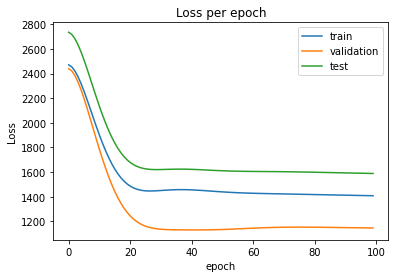

In [61]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)

### 10 Epochs

In [64]:
tr = Model(input_features, output_features, hidden_layers, p=0.5, activation_function = nn.ReLU(inplace = True))
epochs = 1000
train_loss_1,valid_loss_1,test_loss_1 = train(tr,criterion,optimizer,epochs)

Epoch:   1  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:   6  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  11  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  16  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  21  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  26  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  31  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  36  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  41  Training Loss: 2469.76049805 Validation Loss: 2437.472412109375 Test Loss: 2734.015380859375
Epoch:  46  Training Loss: 2469.76049805 Validation Los

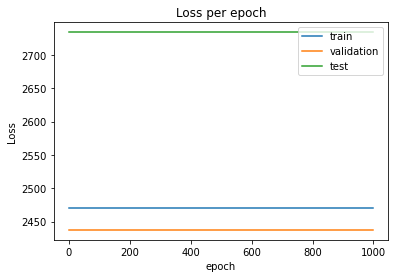

In [65]:
show_diagrams(train_loss_1,valid_loss_1,test_loss_1)